In [1]:
import math
import heapq
import matplotlib.pyplot as plt

In [2]:
class Cell:
  def __init__(self):


    self.parent_i = 0
    self.parent_j = 0
    self.f = float('inf')
    self.g = float('inf')
    self.h = 0

In [3]:
ROW = 9
COL = 10

In [4]:
def is_valid(row, col):
  return (row >= 0) and (row < ROW) and (col >= 0) and (col < COL)

In [5]:
def is_unblocked(grid, row, col):
  return grid[row][col] == 1

In [6]:
def is_destination(row, col, dest):
  return row == dest[0] and col == dest[1]

In [7]:
def calculate_h_value(row, col, dest):
  return ((row - dest[0])**2 + (col - dest[1])**2)**0.5

In [8]:
def trace_path(cell_details, dest):
  print('The path is')
  path =[]
  row=dest[0]
  col=dest[1]

  while not(cell_details[row][col].parent_i==row and cell_details[row][col].parent_j==col):
    path.append((row, col))
    temp_row = cell_details[row][col].parent_i
    temp_col = cell_details[row][col].parent_j
    row = temp_row
    col = temp_col

    path.append((row, col))
    path.reverse()
    for i in path:
      print("->",i, end="")
    print()
    return path

In [9]:
def a_star_search(grid, src, dest):
  if not is_valid(src[0],src[1])or not is_valid(dest[0],dest[1]):
    print("Source or destination is invalid")
    return

  if not is_unblocked(grid, src[0], src[1]) or not is_unblocked(grid, dest[0], dest[1]):
    print("Source or destination is blocked")
    return

  if is_destination(src[0],src[1],dest):
    print("We are already at the destination")
    return

  closed_list= [[False for _ in range(COL)]for _ in range(ROW)]

  cell_details = [[Cell() for _ in range(COL)]for _ in range(ROW)]

  i = src[0]
  j = src[1]
  cell_details[i][j].f = 0
  cell_details[i][j].g = 0
  cell_details[i][j].h = 0
  cell_details[i][j].parent_i = i
  cell_details[i][j].parent_j = j

  open_list = []
  heapq.heappush(open_list, (0.0, i, j))

  found_dest = False

  while len(open_list) > 0:
    p = heapq.heappop(open_list)

    i = p[1]
    j = p[2]
    closed_list[i][j] = True

    directions = [(0,1),(0,-1),(1,0),(-1,0),(1,1),(1,-1),(-1,1),(-1,-1)]
    for dir in directions:
      new_i = i + dir[0]
      new_j = j + dir[1]

      if is_valid(new_i, new_j) and is_unblocked(grid, new_i, new_j) and not closed_list[new_i][new_j]:

        if is_destination(new_i,new_j,dest):
          cell_details[new_i][new_j].parent_i = i
          cell_details[new_i][new_j].parent_j = j
          print("The destination is found")

          path = trace_path(cell_details, dest)
          found_dest = True
          return path
        else:
          g_new = cell_details[i][j].g + 1.0
          h_new = calculate_h_value(new_i,new_j,dest)
          f_new = g_new + h_new

          if cell_details[new_i][new_j].f == float('inf') or cell_details[new_i][new_j].f > f_new:
            heapq.heappush(open_list,(f_new,new_i,new_j))

            cell_details[new_i][new_j].f = f_new
            cell_details[new_i][new_j].g = g_new
            cell_details[new_i][new_j].h = h_new
            cell_details[new_i][new_j].parent_i = i
            cell_details[new_i][new_j].parent_j = j


      if not found_dest:
        print("Failed to find the destination cell")




In [10]:
closed_list= [[False for _ in range(5)]for _ in range(5)]
closed_list

[[False, False, False, False, False],
 [False, False, False, False, False],
 [False, False, False, False, False],
 [False, False, False, False, False],
 [False, False, False, False, False]]

In [11]:
cell_details  = [[Cell() for b in range(COL)] for b in range(ROW)]

In [12]:
cell_details

[[<__main__.Cell at 0x7cca9417de90>,

In [13]:
At = [(0, 5, 10)]
p = heapq.heappop(At)
p

(0, 5, 10)

Grid Visualization

Failed to find the destination cell
Failed to find the destination cell
Failed to find the destination cell
Failed to find the destination cell
Failed to find the destination cell
Failed to find the destination cell
Failed to find the destination cell
Failed to find the destination cell
Failed to find the destination cell
Failed to find the destination cell
Failed to find the destination cell
Failed to find the destination cell
Failed to find the destination cell
Failed to find the destination cell
Failed to find the destination cell
Failed to find the destination cell
Failed to find the destination cell
Failed to find the destination cell
Failed to find the destination cell
Failed to find the destination cell
Failed to find the destination cell
Failed to find the destination cell
Failed to find the destination cell
Failed to find the destination cell
Failed to find the destination cell
Failed to find the destination cell
Failed to find the destination cell
Failed to find the destinati

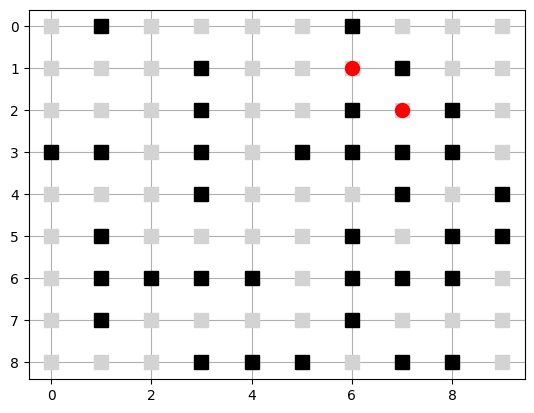

In [15]:
def visualize_grid(grid, path=None):
    fig, ax = plt.subplots()
    for i in range(len(grid)):
        for j in range(len(grid[0])):
            if grid[i][j] == 1:
                ax.plot(j, i, marker='s', color='lightgray', markersize=10)
            else:
                ax.plot(j, i, marker='s', color='black', markersize=10)
    if path:
        for node in path:
            ax.plot(node[1], node[0], marker='o', color='red', markersize=10)
    plt.gca().invert_yaxis()


    plt.grid(True)
    plt.show()

def main():

    grid = [
        [1, 0, 1, 1, 1, 1, 0, 1, 1, 1],
        [1, 1, 1, 0, 1, 1, 1, 0, 1, 1],
        [1, 1, 1, 0, 1, 1, 0, 1, 0, 1],
        [0, 0, 1, 0, 1, 0, 0, 0, 0, 1],
        [1, 1, 1, 0, 1, 1, 1, 0, 1, 0],
        [1, 0, 1, 1, 1, 1, 0, 1, 0, 0],
        [1, 0, 0, 0, 0, 1, 0, 0, 0, 1],
        [1, 0, 1, 1, 1, 1, 0, 1, 1, 1],
        [1, 1, 1, 0, 0, 0, 1, 0, 0, 1]
    ]

    # Define the source and destination
    src = [8, 0]
    dest = [2, 7]

    # Run the A* search algorithm
    path = a_star_search(grid, src, dest)
    visualize_grid(grid, path)

if __name__ == "__main__":
    main()